**Homeworks – Optimization, 2021/22. semester I.**

*Week 5*

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

# Ex1

![img/w5ex1.png](img/w5ex1.png)

The definition of the Bregman divergence given:

$$
D_f(x,y)=f(x)-(f(y)-<\nabla f(y),x-y>)
$$

When $f$ is a strictily convex function the $D_f(x,y)=f(x)-(f(y)-<\nabla f(y),x-y>)=f(x)-f(y)-x^T\nabla f(y)+y^T\nabla f(y)$ is the sum of strictily convex function plus constants. Consequently, $D_f$ is also strictly convex.

# Ex2

![img/w5ex2.png](img/w5ex2.png)

Kullback-Leibler divergence:

$$
D_{KL}(p,q)=-\sum_{i=1}^n p_i \log \frac{q_i}{p_i}
$$

Let $q$ be $p^1$. This yields:

\begin{align}
D_{KL}(p,p^1)&=-\sum_{i=1}^n p_i \log \frac{q_i}{p_i} \\
&=-\sum_{i=1}^n p_i \log \frac{1/n}{p_i} \\
&=\sum_{i=1}^n p_i \log n p_i
\end{align}

Note, that for all $p \in \Delta_n$ and for all $i=1,\dots,n$

- $0\leq p_i \leq 1$ and
- $\sum_ip_i=1$

Using these observations we can write:

\begin{align}
D_{KL}(p,p^1)&=\sum_{i=1}^n p_i \log n p_i \\
&\leq \sum_{i=1}^n \log n p_i\\
&\leq \log n
\end{align}

# Ex3

![img/w5ex3.png](img/w5ex3.png)

The definition of the Bregman divergence given:

$$
D_f(x,y)=f(x)-(f(y)-<\nabla f(y),x-y>)
$$

When $f$ is a convex, differentiable function $f(x)\geq f(y)-<\nabla f(y),x-y>$ and $=$ if and only if when $x=y$. Consequently, $D_f(x,y)\geq 0$.

# Ex4

![img/w5ex4.png](img/w5ex4.png)

Let $f$ be the *squared Euclidean-norm*: $f(x)=\|x\|^2_2=\langle x,x\rangle$

Then the Bregman divergence is the *squared Euclidean distance*:

\begin{align}
D_f(x,y) &= \langle x, x \rangle - \langle y, y \rangle - \langle x-y, \nabla f(y) \rangle \\
&= \langle x, x \rangle - \langle y, y \rangle - \langle x-y, 2y \rangle \\
&= \langle x-y, x-y \rangle \\
&= \|x-y \|^2_2
\end{align}

# Ex8

![img/w5ex8.png](img/w5ex8.png)

## Analysing the problem

In our example

\begin{align}
f(x) &= x \log x \\
f'(x) & =\log x +1 \\
f''(x)& =\frac{1}{x}.
\end{align}

It is clear that $f(x)$ is a convex function, and $f(x=1)=0$.

Also, $f'(x)=0$ when $\log x+1=0 \rightarrow x=0.1$ which is a (global) minimum $(f''(0.1)>0)$ and $f(x=0.1)=-0.1$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# implement our function
f = lambda x: x*np.log10(x) # original function f
f_d = lambda x: np.log10(x) + 1 # first derivative of f
f_d2 = lambda x: 1/x #second derivative of f
#tangent = lambda x, x0: f_d(x0)*(x-x0)+f(x0)

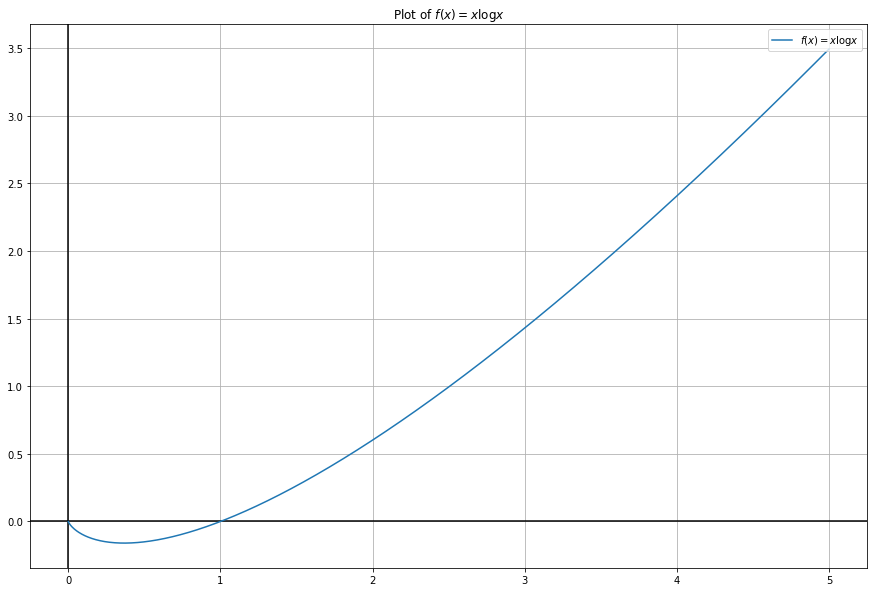

In [3]:
# create 1000 equally spaced points
x = np.linspace(0.0001, 5, 1000)
#x0 = 3

# create plot
fig, ax = plt.subplots()

# draw coordinate lines
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')

# draw curves
ax.plot(x, f(x), label='$f(x)=x\log x$')
#ax.plot(x, f_d(x), label='$\partial f(x)=\log x+1$')
#ax.plot(x, f_d2(x), label='$\partial^2 f(x)=1/x$')
#ax.plot(x, tangent(x, x0), label=f'Tangent of $f$ at $x_0$={x0}')

# misc. plot settings
fig.set_size_inches(15, 10)
plt.legend(loc='upper right')
plt.grid(True)
plt.title("Plot of $f(x)=x\log x$")
# show the plot
plt.show()

Newton's method.

$$
x_{t+1}=x_t + \frac{f(x_t)}{f'(x_t)}
$$

Let's implement Newton's method in Python:

In [4]:
def newtons_method_step(f, f_d, x0, steps):
    t = 0
    x_prev = x0
    while t < steps+1:
        x_next = x_prev - (f(x_prev)/f_d(x_prev))
        print(f'Step{t}: x({t})={x_prev:.2f}-{f(x_prev):.2f}/{f_d(x_prev):.2f}={x_next:.2f}')
        x_prev = x_next
        t += 1
    return x_next

## Finding the root of $f$

First let's apply Newton's method to find the root of our function $f(x)=x \log x$.

Let's start the method from $x_0=1$ and iterate through $10$ steps.

In [5]:
newtons_method_step(f, f_d, x0=1, steps=10)

Step0: x(0)=1.00-0.00/1.00=1.00
Step1: x(1)=1.00-0.00/1.00=1.00
Step2: x(2)=1.00-0.00/1.00=1.00
Step3: x(3)=1.00-0.00/1.00=1.00
Step4: x(4)=1.00-0.00/1.00=1.00
Step5: x(5)=1.00-0.00/1.00=1.00
Step6: x(6)=1.00-0.00/1.00=1.00
Step7: x(7)=1.00-0.00/1.00=1.00
Step8: x(8)=1.00-0.00/1.00=1.00
Step9: x(9)=1.00-0.00/1.00=1.00
Step10: x(10)=1.00-0.00/1.00=1.00


1.0

Now, let's start the method from $x_0=0.3$ and iterate through $10$ steps.

In [6]:
newtons_method_step(f, f_d, x0=0.3, steps=10)

Step0: x(0)=0.30--0.16/0.48=0.63
Step1: x(1)=0.63--0.13/0.80=0.79
Step2: x(2)=0.79--0.08/0.90=0.88
Step3: x(3)=0.88--0.05/0.94=0.93
Step4: x(4)=0.93--0.03/0.97=0.96
Step5: x(5)=0.96--0.02/0.98=0.98
Step6: x(6)=0.98--0.01/0.99=0.99
Step7: x(7)=0.99--0.01/0.99=0.99
Step8: x(8)=0.99--0.00/1.00=1.00
Step9: x(9)=1.00--0.00/1.00=1.00
Step10: x(10)=1.00--0.00/1.00=1.00


0.9987096683943577

Now, let's start the method from $x_0=3$ and iterate through $15$ steps.

In [7]:
newtons_method_step(f, f_d, x0=3, steps=15)

Step0: x(0)=3.00-1.43/1.48=2.03
Step1: x(1)=2.03-0.62/1.31=1.55
Step2: x(2)=1.55-0.30/1.19=1.30
Step3: x(3)=1.30-0.15/1.12=1.17
Step4: x(4)=1.17-0.08/1.07=1.09
Step5: x(5)=1.09-0.04/1.04=1.05
Step6: x(6)=1.05-0.02/1.02=1.03
Step7: x(7)=1.03-0.01/1.01=1.02
Step8: x(8)=1.02-0.01/1.01=1.01
Step9: x(9)=1.01-0.00/1.00=1.01
Step10: x(10)=1.01-0.00/1.00=1.00
Step11: x(11)=1.00-0.00/1.00=1.00
Step12: x(12)=1.00-0.00/1.00=1.00
Step13: x(13)=1.00-0.00/1.00=1.00
Step14: x(14)=1.00-0.00/1.00=1.00
Step15: x(15)=1.00-0.00/1.00=1.00


1.000178053996309

## Minimizing $f$

Now, let's consider the problem of minimizing the same function $f(x)=x \log x$ over $x \in \mathbb{R}_{>0}$. Let's perform
the full convergence analysis of Newton's method - considering all starting points $x_0$ $\in$ $\mathbb{R}_{>0}$ and determine where the method converges for each of them.

Let's remember that the global minimum $f(x=1)=0$.

### From the root

Let's start the method in the root $x_0=1$ and iterate through $10$ steps.

In [8]:
newtons_method_step(f_d, f_d2, x0=1, steps=10)

Step0: x(0)=1.00-1.00/1.00=0.00
Step1: x(1)=0.00--inf/inf=nan
Step2: x(2)=nan-nan/nan=nan
Step3: x(3)=nan-nan/nan=nan
Step4: x(4)=nan-nan/nan=nan
Step5: x(5)=nan-nan/nan=nan
Step6: x(6)=nan-nan/nan=nan
Step7: x(7)=nan-nan/nan=nan
Step8: x(8)=nan-nan/nan=nan
Step9: x(9)=nan-nan/nan=nan
Step10: x(10)=nan-nan/nan=nan


<ipython-input-2-a55c33514a81>:3: RuntimeWarning: divide by zero encountered in log10
  f_d = lambda x: np.log10(x) + 1 # first derivative of f
<ipython-input-2-a55c33514a81>:4: RuntimeWarning: divide by zero encountered in double_scalars
  f_d2 = lambda x: 1/x #second derivative of f
<ipython-input-4-ba8f198b8438>:5: RuntimeWarning: invalid value encountered in double_scalars
  x_next = x_prev - (f(x_prev)/f_d(x_prev))


nan

The method does not converge when starting in the root.

### Above the root

Let's try starting it above the root.

In [9]:
newtons_method_step(f_d, f_d2, x0=3, steps=10)

Step0: x(0)=3.00-1.48/0.33=-1.43
Step1: x(1)=-1.43-nan/-0.70=nan
Step2: x(2)=nan-nan/nan=nan
Step3: x(3)=nan-nan/nan=nan
Step4: x(4)=nan-nan/nan=nan
Step5: x(5)=nan-nan/nan=nan
Step6: x(6)=nan-nan/nan=nan
Step7: x(7)=nan-nan/nan=nan
Step8: x(8)=nan-nan/nan=nan
Step9: x(9)=nan-nan/nan=nan
Step10: x(10)=nan-nan/nan=nan


<ipython-input-2-a55c33514a81>:3: RuntimeWarning: invalid value encountered in log10
  f_d = lambda x: np.log10(x) + 1 # first derivative of f


nan

The method does not converge when starting above the root.

### Below the root

Let's try starting it below the root.

In [10]:
newtons_method_step(f_d, f_d2, x0=0.5, steps=15)

Step0: x(0)=0.50-0.70/2.00=0.15
Step1: x(1)=0.15-0.18/6.64=0.12
Step2: x(2)=0.12-0.09/8.08=0.11
Step3: x(3)=0.11-0.05/8.90=0.11
Step4: x(4)=0.11-0.03/9.38=0.10
Step5: x(5)=0.10-0.02/9.65=0.10
Step6: x(6)=0.10-0.01/9.80=0.10
Step7: x(7)=0.10-0.00/9.89=0.10
Step8: x(8)=0.10-0.00/9.94=0.10
Step9: x(9)=0.10-0.00/9.96=0.10
Step10: x(10)=0.10-0.00/9.98=0.10
Step11: x(11)=0.10-0.00/9.99=0.10
Step12: x(12)=0.10-0.00/9.99=0.10
Step13: x(13)=0.10-0.00/10.00=0.10
Step14: x(14)=0.10-0.00/10.00=0.10
Step15: x(15)=0.10-0.00/10.00=0.10


0.10000674642712831

The method converges when the starting point is below the root and positive.